<a href="https://www.kaggle.com/code/pranavpadmanabhan/electronic-sales-data?scriptVersionId=185676973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice-eda-on-this-sales-dataset/Sales_August_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_May_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_February_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_November_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_January_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_March_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_September_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_April_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_July_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_October_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_June_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_December_2019.csv


# When dealing with mulitple files, for loop and combining all the files using concat

In [2]:
import glob
import os

path = '/kaggle/input/practice-eda-on-this-sales-dataset'
all_files = glob.glob(os.path.join(path, '*.csv'))

# Read and concatenate all CSV files
df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)

# Optionally, save the combined dataframe to a new CSV file
df.to_csv('combined_dataset.csv', index=False)

# Display the first few rows of the combined dataframe
print(df.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   236670            Wired Headphones                2      11.99   
1   236671  Bose SoundSport Headphones                1      99.99   
2   236672                      iPhone                1      700.0   
3   236673       AA Batteries (4-pack)                2       3.84   
4   236674       AA Batteries (4-pack)                2       3.84   

       Order Date                      Purchase Address  
0  08/31/19 22:21      359 Spruce St, Seattle, WA 98101  
1  08/15/19 15:11        492 Ridge St, Dallas, TX 75001  
2  08/06/19 14:40        149 7th St, Portland, OR 97035  
3  08/29/19 20:59     631 2nd St, Los Angeles, CA 90001  
4  08/15/19 19:53  736 14th St, New York City, NY 10001  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# df=pd.read_csv('/kaggle/input/practice-eda-on-this-sales-dataset/Sales_April_2019.csv')

In [5]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
5,236675,Wired Headphones,1,11.99,08/02/19 23:54,"470 Hill St, San Francisco, CA 94016"
6,236676,34in Ultrawide Monitor,1,379.99,08/04/19 19:52,"470 Cherry St, Los Angeles, CA 90001"
7,236677,20in Monitor,1,109.99,08/13/19 07:16,"918 6th St, San Francisco, CA 94016"
8,236678,Wired Headphones,1,11.99,08/25/19 20:11,"58 9th St, San Francisco, CA 94016"
9,236679,Macbook Pro Laptop,1,1700.0,08/07/19 15:43,"239 Spruce St, Los Angeles, CA 90001"


In [6]:
a=df[['Quantity Ordered','Price Each']]
a.describe()

,Quantity Ordered,Price Each
count,186305,186305
unique,10,24
top,1,11.95
freq,168552,21903


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
# df=pd.to_numeric(df[['Quantity Ordered','Price Each']],errors='coerce')
df[['Quantity Ordered','Price Each']]=df[['Quantity Ordered','Price Each']].apply(pd.to_numeric,errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(2), object(4)
memory usage: 8.6+ MB


In [10]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
df.isnull().sum()/len(df)

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.004817
Price Each          0.004817
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [12]:
df.dropna(how='all',inplace=True)

In [13]:
df.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


<Axes: xlabel='Price Each'>

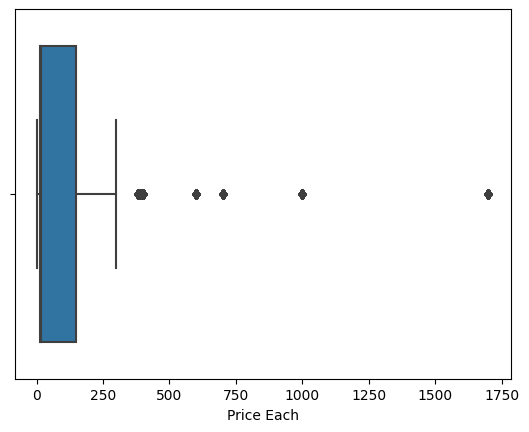

In [14]:
sns.boxplot(data=df,x='Price Each')

In [15]:
count_high_price = np.sum(df['Price Each'] > 250)
print(count_high_price)

41807


In [16]:
df.isnull().sum()

Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date            0
Purchase Address      0
dtype: int64

In [17]:
df['Order Date'].unique()

array(['08/31/19 22:21', '08/15/19 15:11', '08/06/19 14:40', ...,
       '12/01/19 12:01', '12/09/19 06:43', '12/03/19 10:39'], dtype=object)

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')

/tmp/ipykernel_18/3483178216.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')


In [19]:
df.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
95,236762,AAA Batteries (4-pack),1.0,2.99,2019-08-16 14:25:00,"632 Cherry St, San Francisco, CA 94016"
96,236763,Apple Airpods Headphones,1.0,150.00,2019-08-06 10:23:00,"288 Lake St, Seattle, WA 98101"
97,236764,Bose SoundSport Headphones,1.0,99.99,2019-08-22 15:48:00,"663 Elm St, Boston, MA 02215"
98,236765,Wired Headphones,1.0,11.99,2019-08-24 10:48:00,"731 10th St, San Francisco, CA 94016"


In [20]:
a=np.sum(df['Order Date']=='Null')
a

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [23]:
df['Quantity Ordered'].unique()

array([ 2.,  1.,  3.,  4., nan,  6.,  7.,  5.,  8.,  9.])

In [24]:
a=df['Quantity Ordered']=='Quantity Ordered'
a.sum()

0

# Q1. What was the best month for sales? How much was earned that month?


In [25]:
df['Total Sales']=df['Quantity Ordered']*df['Price Each']

In [26]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


In [27]:
df.groupby

<bound method DataFrame.groupby of        Order ID                     Product  Quantity Ordered  Price Each  \
0        236670            Wired Headphones               2.0       11.99   
1        236671  Bose SoundSport Headphones               1.0       99.99   
2        236672                      iPhone               1.0      700.00   
3        236673       AA Batteries (4-pack)               2.0        3.84   
4        236674       AA Batteries (4-pack)               2.0        3.84   
...         ...                         ...               ...         ...   
186845   319666    Lightning Charging Cable               1.0       14.95   
186846   319667       AA Batteries (4-pack)               2.0        3.84   
186847   319668             Vareebadd Phone               1.0      400.00   
186848   319669            Wired Headphones               1.0       11.99   
186849   319670  Bose SoundSport Headphones               1.0       99.99   

                Order Date              

In [28]:
dfgrp=df.groupby(by=df['Order Date'].dt.month)['Total Sales'].sum().reset_index()
dfgrp

,Order Date,Total Sales
0,1.0,1822256.73
1,2.0,2202022.42
2,3.0,2807100.38
3,4.0,3390670.24
4,5.0,3152606.75
5,6.0,2577802.26
6,7.0,2647775.76
7,8.0,2244467.88
8,9.0,2097560.13
9,10.0,3736726.88


In [29]:
dfgrp.sort_values(by='Total Sales',ascending=False)

,Order Date,Total Sales
11,12.0,4613443.34
9,10.0,3736726.88
3,4.0,3390670.24
10,11.0,3199603.20
4,5.0,3152606.75
2,3.0,2807100.38
6,7.0,2647775.76
5,6.0,2577802.26
7,8.0,2244467.88
1,2.0,2202022.42


# The best month is December and total sale is 4613443.34

In [30]:
dfgrp.idxmax()

Order Date     11
Total Sales    11
dtype: int64

<BarContainer object of 12 artists>

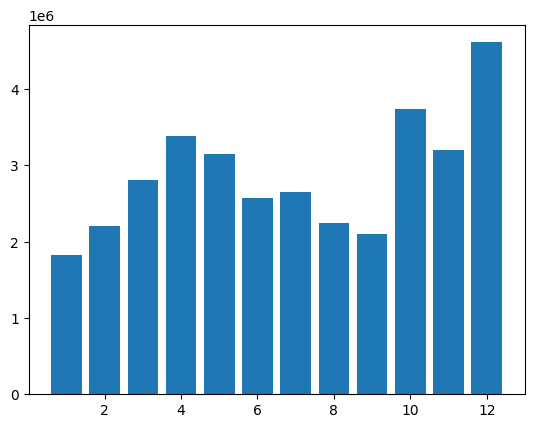

In [31]:
mon=range(1,13)
plt.bar(dfgrp['Order Date'],dfgrp['Total Sales'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Order Date', ylabel='Total Sales'>

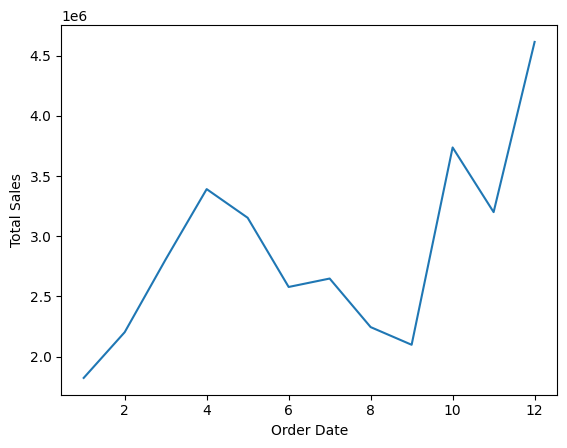

In [32]:
sns.lineplot(data=dfgrp,x='Order Date',y='Total Sales')

In [33]:
df['Order Date'].dt.month.unique()

array([ 8., nan,  9.,  5.,  6.,  2.,  3., 11., 12.,  1.,  4., 10.,  7.])

In [34]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68
5,236675,Wired Headphones,1.0,11.99,2019-08-02 23:54:00,"470 Hill St, San Francisco, CA 94016",11.99
6,236676,34in Ultrawide Monitor,1.0,379.99,2019-08-04 19:52:00,"470 Cherry St, Los Angeles, CA 90001",379.99
7,236677,20in Monitor,1.0,109.99,2019-08-13 07:16:00,"918 6th St, San Francisco, CA 94016",109.99
8,236678,Wired Headphones,1.0,11.99,2019-08-25 20:11:00,"58 9th St, San Francisco, CA 94016",11.99
9,236679,Macbook Pro Laptop,1.0,1700.00,2019-08-07 15:43:00,"239 Spruce St, Los Angeles, CA 90001",1700.00


# What city sold the most product?


In [35]:
df['city']=df['Purchase Address'].str.split(',').str[1]
# df['city']=df['city'].str[1:2]
# df['city']=df['city'].str.strip()
df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,city
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City
5,236675,Wired Headphones,1.0,11.99,2019-08-02 23:54:00,"470 Hill St, San Francisco, CA 94016",11.99,San Francisco
6,236676,34in Ultrawide Monitor,1.0,379.99,2019-08-04 19:52:00,"470 Cherry St, Los Angeles, CA 90001",379.99,Los Angeles
7,236677,20in Monitor,1.0,109.99,2019-08-13 07:16:00,"918 6th St, San Francisco, CA 94016",109.99,San Francisco
8,236678,Wired Headphones,1.0,11.99,2019-08-25 20:11:00,"58 9th St, San Francisco, CA 94016",11.99,San Francisco
9,236679,Macbook Pro Laptop,1.0,1700.00,2019-08-07 15:43:00,"239 Spruce St, Los Angeles, CA 90001",1700.00,Los Angeles


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Total Sales       185950 non-null  float64       
 7   city              185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 12.8+ MB


In [37]:
a=df.groupby(by=df['city'])['Quantity Ordered'].sum().reset_index()
a.sort_values(by='Quantity Ordered',ascending=False)

,city,Quantity Ordered
7,San Francisco,50239.0
4,Los Angeles,33289.0
5,New York City,27932.0
2,Boston,22528.0
3,Dallas,16730.0
0,Atlanta,16602.0
8,Seattle,16553.0
6,Portland,14053.0
1,Austin,11153.0


# San Francisco orders the most 

<Axes: xlabel='city', ylabel='Quantity Ordered'>

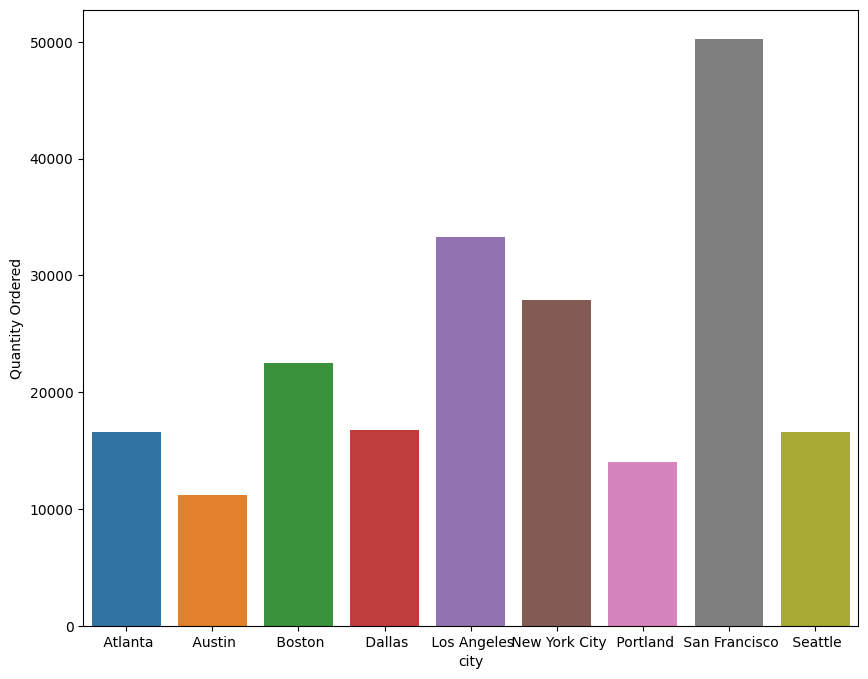

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(data=a,x='city',y='Quantity Ordered')

# What time should we display advertisements to maximize the likelihood of customers buying products?


In [39]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,city
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City
5,236675,Wired Headphones,1.0,11.99,2019-08-02 23:54:00,"470 Hill St, San Francisco, CA 94016",11.99,San Francisco
6,236676,34in Ultrawide Monitor,1.0,379.99,2019-08-04 19:52:00,"470 Cherry St, Los Angeles, CA 90001",379.99,Los Angeles
7,236677,20in Monitor,1.0,109.99,2019-08-13 07:16:00,"918 6th St, San Francisco, CA 94016",109.99,San Francisco
8,236678,Wired Headphones,1.0,11.99,2019-08-25 20:11:00,"58 9th St, San Francisco, CA 94016",11.99,San Francisco
9,236679,Macbook Pro Laptop,1.0,1700.00,2019-08-07 15:43:00,"239 Spruce St, Los Angeles, CA 90001",1700.00,Los Angeles


In [40]:
b=df.groupby(by=df['Order Date'].dt.hour)['Total Sales'].count().reset_index()
b

,Order Date,Total Sales
0,0.0,3910
1,1.0,2350
2,2.0,1243
3,3.0,831
4,4.0,854
5,5.0,1321
6,6.0,2482
7,7.0,4011
8,8.0,6256
9,9.0,8748


<Axes: xlabel='Order Date', ylabel='Total Sales'>

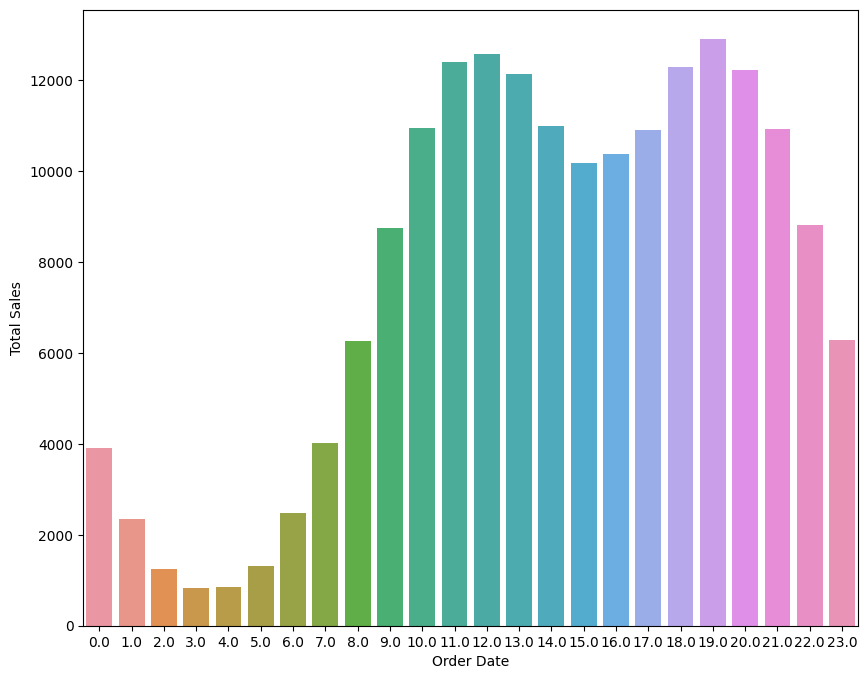

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(data=b,x='Order Date',y='Total Sales')
# plt.xticks(b['Order Date'])

# From the 10:00 to 14:00 and 17:00 to 21:00 is the suitable time for adveristment 

# Q. What products are most often sold together?


In [42]:
df[df['Order ID'].duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,city
46,236716,AA Batteries (4-pack),2.0,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",7.68,San Francisco
47,236716,USB-C Charging Cable,1.0,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",11.95,San Francisco
60,236729,iPhone,1.0,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",700.00,San Francisco
61,236729,Apple Airpods Headphones,1.0,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",150.00,San Francisco
62,236730,Google Phone,1.0,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",600.00,New York City
...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",11.99,Portland
186773,319596,iPhone,1.0,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",700.00,New York City
186774,319596,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",14.95,New York City
186809,319631,34in Ultrawide Monitor,1.0,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",379.99,Austin


In [43]:
# c= df.groupby('Order ID').agg(df['Product']: lambda x: ', '.join(x)).reset_index=False
# c.head(20)


In [44]:
c = df.groupby('Order ID').agg({
    'Product': lambda x: ', '.join(x)                               # Take the first city
}).reset_index()

In [45]:
c.head()

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones


In [46]:
c.set_index('Order ID')

,Product
Order ID,
141234,iPhone
141235,Lightning Charging Cable
141236,Wired Headphones
141237,27in FHD Monitor
141238,Wired Headphones
...,...
319667,AA Batteries (4-pack)
319668,Vareebadd Phone
319669,Wired Headphones


In [47]:
d=c[c['Product'].str.contains(',').reset_index(drop=True)]
d

,Order ID,Product
41,141275,"USB-C Charging Cable, Wired Headphones"
56,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
131,141365,"Vareebadd Phone, Wired Headphones"
150,141384,"Google Phone, USB-C Charging Cable"
216,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
178322,319556,"Google Phone, Wired Headphones"
178350,319584,"iPhone, Wired Headphones"
178362,319596,"iPhone, Lightning Charging Cable"
178397,319631,"34in Ultrawide Monitor, Lightning Charging Cable"


In [48]:
d

,Order ID,Product
41,141275,"USB-C Charging Cable, Wired Headphones"
56,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
131,141365,"Vareebadd Phone, Wired Headphones"
150,141384,"Google Phone, USB-C Charging Cable"
216,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
178322,319556,"Google Phone, Wired Headphones"
178350,319584,"iPhone, Wired Headphones"
178362,319596,"iPhone, Lightning Charging Cable"
178397,319631,"34in Ultrawide Monitor, Lightning Charging Cable"


In [49]:
d.drop(index = 178437,inplace=True)

/tmp/ipykernel_18/2852360478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(index = 178437,inplace=True)


In [50]:
# d['count']= d['Product'].value_counts()
# d
product_counts = d['Product'].value_counts()

d['count'] = d['Product'].map(product_counts)
f=d.groupby(by=d['Product']).count().reset_index()
f

/tmp/ipykernel_18/1728410099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['count'] = d['Product'].map(product_counts)


,Product,Order ID,count
0,"20in Monitor, 20in Monitor",3,3
1,"20in Monitor, 27in FHD Monitor",2,2
2,"20in Monitor, 34in Ultrawide Monitor",1,1
3,"20in Monitor, AA Batteries (4-pack)",6,6
4,"20in Monitor, AAA Batteries (4-pack)",3,3
...,...,...,...
361,"iPhone, USB-C Charging Cable",12,12
362,"iPhone, Vareebadd Phone",3,3
363,"iPhone, Wired Headphones",361,361
364,"iPhone, Wired Headphones, Lightning Charging C...",1,1


In [51]:
top5=f.sort_values(by='count',ascending=False).head(5)
top5

,Product,Order ID,count
342,"iPhone, Lightning Charging Cable",882,882
173,"Google Phone, USB-C Charging Cable",856,856
363,"iPhone, Wired Headphones",361,361
299,"Vareebadd Phone, USB-C Charging Cable",312,312
191,"Google Phone, Wired Headphones",303,303


<Axes: xlabel='Product', ylabel='count'>

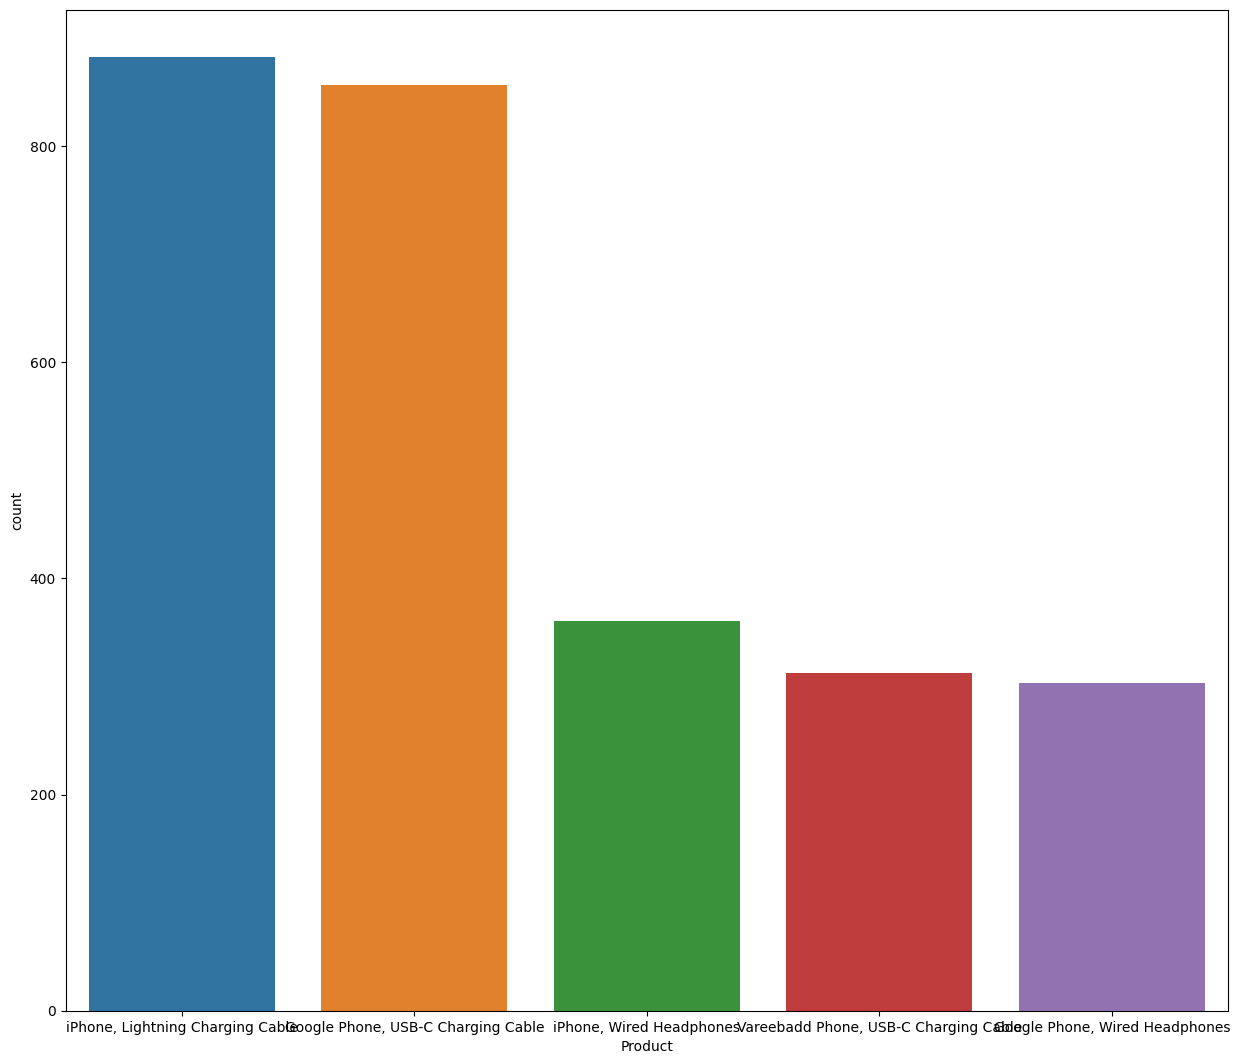

In [52]:
plt.figure(figsize=(15,13))
sns.barplot(data=top5,y='count',x='Product')

# Most sold product together products are (iPhone, Lightning Charging Cable	882) and (Google Phone, USB-C Charging Cable	856)

# Q.  What product sold the most? Why do you think it sold the most?


In [53]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,city
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,San Francisco
186846,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Los Angeles
186847,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,Seattle
186848,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,Dallas


In [54]:
a=df.groupby(by='Product')['Quantity Ordered'].sum().reset_index()

In [55]:
a.sort_values(by='Quantity Ordered',ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
16,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
18,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
2,27in FHD Monitor,7550.0
19,iPhone,6849.0
1,27in 4K Gaming Monitor,6244.0


# The most selling product is AAA Batteries (4-pack)	the reason for is it is used frequently and used by many and its cheap